In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
%config IPCompleter.greedy=True

In [3]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]
)

In [4]:
trainset = torchvision.datasets.EMNIST(root='../../data/EMNIST_LETTERS',
                                       split = 'letters',
                                       train = True, 
#                                        download = True,
                                        download = False,
                                       transform = transform)


testset = torchvision.datasets.EMNIST(root='../../data/EMNIST_LETTERS',
                                      split = 'letters',
                                      train = False, 
#                                       download = True,
                                       download = False,
                                      transform = transform)

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, 
                                         batch_size=32, 
                                         shuffle = True, 
                                         num_workers=4)


testloader = torch.utils.data.DataLoader(testset, 
                                        batch_size=32, 
                                        shuffle = False, 
                                        num_workers = 4)

In [6]:
classes = ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z')

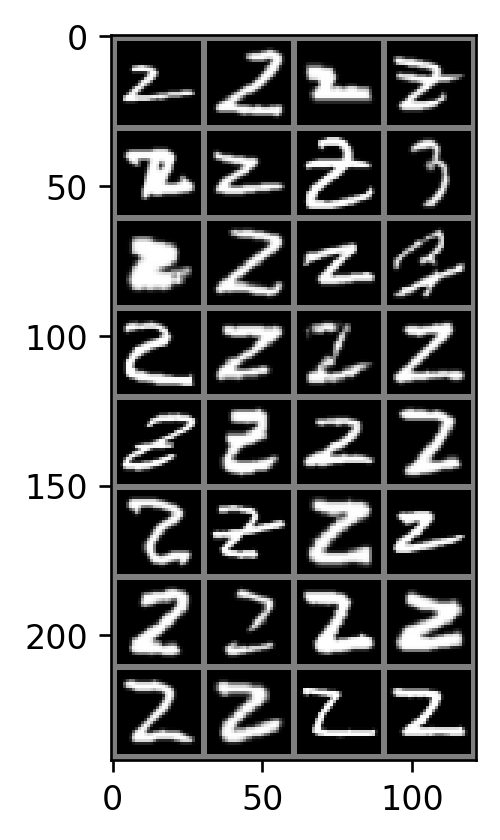

tensor([26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
        26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26])


In [7]:
import numpy as np
import matplotlib.pyplot as plt


dataloader = iter(testloader)

for i in range(649):
    images, labels = dataloader.next()
# print(images.size())

def imshow(img):
    img  = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(num=None, figsize=(10, 4), dpi=240, facecolor='w', edgecolor='k')
    plt.imshow(np.transpose(npimg, (2, 1, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images))
# print(' '.join('%5s'% classes[label - 1] for label in labels))
print(labels)

In [9]:
print(labels.size())

torch.Size([32])


In [57]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 18, 5)
        self.conv3 = nn.Conv2d(18, 24, 7)
        
        self.to_linear = None
        x = torch.randn(28, 28).view(-1, 1, 28, 28)
        self.convs(x)
        
        self.fc1 = nn.Linear(self.to_linear, 512)
        self.fc2 = nn.Linear(512, 26)
        
    def convs(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        size = x.size()[1:]
#         print(size)
        if self.to_linear is None:
            features = 1
            for s in size:
                features *= s
            self.to_linear = features
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self.to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
net = Net()
print(net)
        
        

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 18, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(18, 24, kernel_size=(7, 7), stride=(1, 1))
  (fc1): Linear(in_features=4704, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=26, bias=True)
)


In [58]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Running on : {device}")
net.to(device)

Running on : cuda:0


Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 18, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(18, 24, kernel_size=(7, 7), stride=(1, 1))
  (fc1): Linear(in_features=4704, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=26, bias=True)
)

In [62]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.00069, momentum=0.95)

Starting training...
Epoch - 1


1010it [00:14, 71.11it/s]

Loss - 0.12410377523303032 Batches_passed : 1000


2010it [00:28, 71.04it/s]

Loss - 0.12394358824193477 Batches_passed : 3000


3010it [00:42, 70.32it/s]

Loss - 0.1189351991713047 Batches_passed : 6000


3900it [00:55, 70.57it/s]

Epoch - 2



1012it [00:14, 70.11it/s]

Loss - 0.09332506120204925 Batches_passed : 1000


2012it [00:28, 70.70it/s]

Loss - 0.10235769019275903 Batches_passed : 3000


3008it [00:42, 70.67it/s]

Loss - 0.10056412636488676 Batches_passed : 6000


3900it [00:55, 70.23it/s]

Epoch - 3



1009it [00:14, 70.41it/s]

Loss - 0.08545372251421213 Batches_passed : 1000


2012it [00:28, 69.69it/s]

Loss - 0.08670121460407973 Batches_passed : 3000


3013it [00:42, 70.09it/s]

Loss - 0.08944002009928226 Batches_passed : 6000


3900it [00:55, 70.23it/s]

Epoch - 4



1008it [00:14, 70.31it/s]

Loss - 0.0732247616648674 Batches_passed : 1000


2013it [00:28, 70.11it/s]

Loss - 0.07891165395826101 Batches_passed : 3000


3010it [00:42, 70.15it/s]

Loss - 0.07942395365238189 Batches_passed : 6000


3900it [00:55, 70.25it/s]

Epoch - 5



1013it [00:14, 69.97it/s]

Loss - 0.06341407251358032 Batches_passed : 1000


2012it [00:28, 70.38it/s]

Loss - 0.0701186965405941 Batches_passed : 3000


3012it [00:42, 69.96it/s]

Loss - 0.06758217111229897 Batches_passed : 6000


3900it [00:55, 70.19it/s]


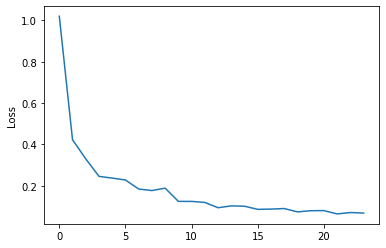

In [63]:
from tqdm import tqdm

# loss_track = []

print("Starting training...")
for epoch in range(5):
    print(f"Epoch - {epoch + 1}")
    running_loss = 0.0
    batch_count = 0       
    for i, data in tqdm(enumerate(trainloader)):
        inputs, labels = data[0].to(device), data[1].to(device)
        net.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs, labels - 1)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 1000 == 999:
            batch_count += i + 1
            batch_loss = running_loss / 1000
            loss_track.append(batch_loss)
            print(f"Loss - {batch_loss} Batches_passed : {batch_count}")
            running_loss = 0.0

            
#For plotting loss
plt.plot(loss_track)
plt.ylabel("Loss")
plt.show()


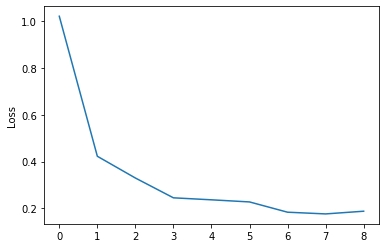

In [61]:
#For plotting loss
plt.plot(loss_track)
plt.ylabel("Loss")
plt.show()


In [66]:
PATH = "./emnist_net.pth"

# torch.save(net.state_dict(), PATH)

In [67]:
net = Net()
net.to(device)

net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [37]:
dataiter = iter(testloader)

for i in range(649):
    data = dataiter.next()
    images, labels = data[0].to(device), data[1].to(device)

# imshow(torchvision.utils.make_grid(images))
# print(' '.join('%5s'% classes[label - 1] for label in labels))
labels - 1

tensor([25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
       device='cuda:0')

In [38]:
outputs = net(images)

In [39]:
_, predicted = torch.max(outputs, 1)

# print(' '.join('%5s' % classes[p_label - 1] for p_label in predicted))
# for p_label in predicted:
#     print(p_label - 1)
predicted

tensor([25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25,  9,  6, 25, 25, 25, 25, 25],
       device='cuda:0')

In [64]:


correct = 0
total = 0

with torch.no_grad():
    for data in tqdm(trainloader):
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        labels = labels - 1
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print(f"Train acc for {total} images : {correct * 100 / total}")
    
    correct = 0
    total = 0
    for data in tqdm(testloader):
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        labels = labels - 1
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Test acc for {total} images : {correct * 100 / total}")


  0%|          | 0/650 [00:00<?, ?it/s]

Train acc for 124800 images : 97.63141025641026


100%|██████████| 650/650 [00:02<00:00, 239.14it/s]

Test acc for 20800 images : 93.1826923076923


In [ ]:
print(f"Test acc for {total} images : {correct * 100 / total}")

In [65]:
class_correct = list(0 for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))

with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        labels = labels - 1
        c = (predicted == labels).squeeze()
        for i, label in enumerate(labels):
            class_correct[label - 1] += c[i]
            class_total[label - 1] += 1
    
    for i in range(len(classes)):
        print(f"Accuracy of {classes[i]} : {class_correct[i] * 100 / class_total[i]}")

100%|██████████| 650/650 [00:04<00:00, 133.17it/s]

Accuracy of a : 95.0
Accuracy of b : 94.5
Accuracy of c : 94.0
Accuracy of d : 96.75
Accuracy of e : 94.375
Accuracy of f : 81.375
Accuracy of g : 95.25
Accuracy of h : 74.0
Accuracy of i : 91.75
Accuracy of j : 96.125
Accuracy of k : 78.375
Accuracy of l : 98.0
Accuracy of m : 95.125
Accuracy of n : 97.25
Accuracy of o : 98.25
Accuracy of p : 85.625
Accuracy of q : 95.0
Accuracy of r : 97.625
Accuracy of s : 96.375
Accuracy of t : 93.75
Accuracy of u : 92.5
Accuracy of v : 97.125
Accuracy of w : 96.125
Accuracy of x : 94.625
Accuracy of y : 98.5
Accuracy of z : 95.375
